# PREDICT ACCIDENT SEVERITY

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
data = pd.read_csv("Data-Collisions.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# EDA 

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

# DROPPING IRRELEVANT COLUMNS

In [4]:
df = data.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

# FINDING MISSING VALUES

In [7]:
def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

SEVERITYCODE
False    143747
Name: SEVERITYCODE, dtype: int64
1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

X
False    143747
Name: X, dtype: int64
-122.328079    234
-122.332653    192
-122.344896    179
-122.299160    176
-122.344997    173
              ... 
-122.392987      1
-122.357280      1
-122.378494      1
-122.366667      1
-122.387386      1
Name: X, Length: 20245, dtype: int64

Y
False    143747
Name: Y, dtype: int64
47.604161    234
47.708655    192
47.717173    179
47.579673    176
47.725036    173
            ... 
47.689643      1
47.673982      1
47.677600      1
47.557843      1
47.723089      1
Name: Y, Length: 20459, dtype: int64

ADDRTYPE
False    143747
Name: ADDRTYPE, dtype: int64
Block           86383
Intersection    57364
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    143747
Name: SEVERITYCODE.1, dtype: int64
1    94821
2    48926
Name: SEVERITYCODE.1, dtype: int64

COLLISIONTYPE
False    143747
Name: COLLISIONTYPE, dtype: int64
Angles        

# HANDLING MISSING VALUES

In [9]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns with more than 20% values missing (INATTENTIONIND,PEDROWNOTGRNT,SPEEDING)
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with less than 20% values missing (X, Y,COLLISIONTYPE,JUNCTIONTYPE,
                                                            #UNDERINFL,WEATHER,ROADCOND,LIGHTCOND)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

SEVERITYCODE
False    143747
Name: SEVERITYCODE, dtype: int64
1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

X
False    143747
Name: X, dtype: int64
-122.328079    234
-122.332653    192
-122.344896    179
-122.299160    176
-122.344997    173
              ... 
-122.392987      1
-122.357280      1
-122.378494      1
-122.366667      1
-122.387386      1
Name: X, Length: 20245, dtype: int64

Y
False    143747
Name: Y, dtype: int64
47.604161    234
47.708655    192
47.717173    179
47.579673    176
47.725036    173
            ... 
47.689643      1
47.673982      1
47.677600      1
47.557843      1
47.723089      1
Name: Y, Length: 20459, dtype: int64

ADDRTYPE
False    143747
Name: ADDRTYPE, dtype: int64
Block           86383
Intersection    57364
Name: ADDRTYPE, dtype: int64

SEVERITYCODE.1
False    143747
Name: SEVERITYCODE.1, dtype: int64
1    94821
2    48926
Name: SEVERITYCODE.1, dtype: int64

COLLISIONTYPE
False    143747
Name: COLLISIONTYPE, dtype: int64
Angles        

In [10]:
df['SEVERITYCODE'].value_counts()

1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

# CREATING BALANCED DATASET

In [11]:
df= df.sample(frac=1,random_state=0,replace=False)

# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = df.loc[df['SEVERITYCODE'] == 2]

# 2 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode1 = df.loc[df['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

# 3 - concatenating datasets to get balanced dataset
df_balanced = pd.concat([df_scode1,df_scode2])
df_balanced = df_balanced.sample(frac=1,random_state=0,replace=False)

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

#checking if dataset balanced
print(df_balanced.info())
print(df_balanced['SEVERITYCODE'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEVERITYCODE    97852 non-null  int64  
 1   X               97852 non-null  float64
 2   Y               97852 non-null  float64
 3   ADDRTYPE        97852 non-null  object 
 4   SEVERITYCODE.1  97852 non-null  int64  
 5   COLLISIONTYPE   97852 non-null  object 
 6   PERSONCOUNT     97852 non-null  int64  
 7   PEDCOUNT        97852 non-null  int64  
 8   PEDCYLCOUNT     97852 non-null  int64  
 9   VEHCOUNT        97852 non-null  int64  
 10  JUNCTIONTYPE    97852 non-null  object 
 11  UNDERINFL       97852 non-null  object 
 12  WEATHER         97852 non-null  object 
 13  ROADCOND        97852 non-null  object 
 14  LIGHTCOND       97852 non-null  object 
 15  HITPARKEDCAR    97852 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 12.7+ MB
None
2    489

# Encoding Categorical Columns and performing Train Test Split of dataset

In [12]:
X = df_balanced.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
X = pd.get_dummies(data=X, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

Y = df_balanced[['SEVERITYCODE']]
print(X.info())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97852 entries, 139054 to 72625
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   X                                                               97852 non-null  float64
 1   Y                                                               97852 non-null  float64
 2   SEVERITYCODE.1                                                  97852 non-null  int64  
 3   PERSONCOUNT                                                     97852 non-null  int64  
 4   PEDCOUNT                                                        97852 non-null  int64  
 5   PEDCYLCOUNT                                                     97852 non-null  int64  
 6   VEHCOUNT                                                        97852 non-null  int64  
 7   ADDRTYPE_Block                              

# NORMALIZING OR FEATURE SCALING

In [16]:
scaler = StandardScaler()
X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 157089 to 61252
Data columns (total 51 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   X                                                               78281 non-null  float64
 1   Y                                                               78281 non-null  float64
 2   SEVERITYCODE.1                                                  78281 non-null  int64  
 3   PERSONCOUNT                                                     78281 non-null  float64
 4   PEDCOUNT                                                        78281 non-null  float64
 5   PEDCYLCOUNT                                                     78281 non-null  float64
 6   VEHCOUNT                                                        78281 non-null  float64
 7   ADDRTYPE_Block                              

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

# APPLYING ALGORITHMS

### LOGISTIC REGRESSION

In [19]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)

#Confusion Matrix
lr_cm = confusion_matrix(Y_test,lr_predictions)
print(lr_cm,'\n')

#Classification Report
lr_cr = classification_report(Y_test,lr_predictions)
print(lr_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,lr_predictions)
print(acc,'\n')
accDict = {}
accDict['LR'] = acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



### NAIVE BAYES

In [21]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_predictions = nb.predict(X_test)

#Confusion Matrix
nb_cm=confusion_matrix(Y_test,nb_predictions)
print(nb_cm,'\n')

#Classification Report
nb_cr = classification_report(Y_test,nb_predictions)
print(nb_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,nb_predictions)
print(acc,'\n')
accDict['NB'] = acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



### DECISION TREE CLASSIFIER

In [22]:
dtc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dtc1 = GridSearchCV(dtc, param_grid=params)
dtc1.fit(X_train,Y_train)
dtc_predictions = dtc1.predict(X_test)
print('Best Hyperparameter DTC : ',dtc1.best_params_)

#Confusion Matrix
dtc_cm=confusion_matrix(Y_test,dtc_predictions)
print(dtc_cm,'\n')

#Classification Report
dtc_cr = classification_report(Y_test,dtc_predictions)
print(dtc_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,dtc_predictions)
print(acc,'\n')
accDict['DTC'] = acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter DTC :  {'criterion': 'gini', 'random_state': 0}
[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



### RANDOM FOREST CLASSIFIER

In [23]:
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(X_train,Y_train)
rf_predictions = rf1.predict(X_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(Y_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,rf_predictions)
print(acc,'\n')
accDict['RFT'] = acc


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Best Hyperparameter RFT :  {'criterion': 'gini', 'n_estimators': 50, 'random_state': 0}
[[9847    0]
 [   0 9724]] 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9847
           2       1.00      1.00      1.00      9724

    accuracy                           1.00     19571
   macro avg       1.00      1.00      1.00     19571
weighted avg       1.00      1.00      1.00     19571
 

1.0 



## COMPARING MODELS

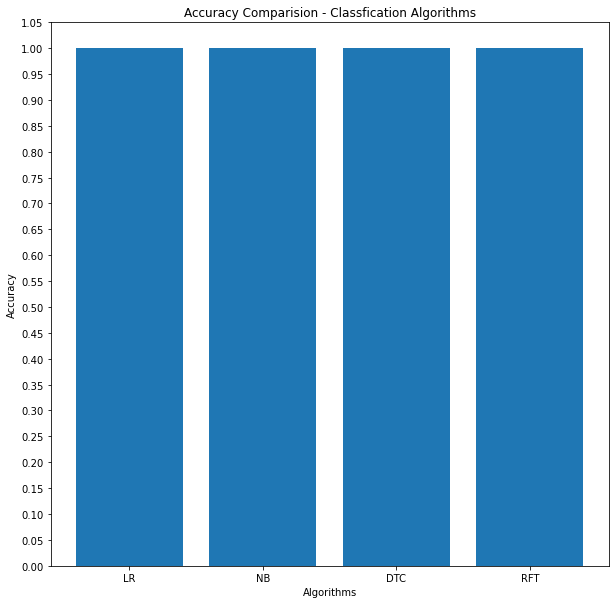

In [25]:
accDict = sorted(accDict.items(), key=lambda x: x[1], reverse=True)
dict1 = {}
for elem in accDict:
    dict1[elem[0]] = elem[1]
Algorithms = dict1.keys()
Accuracy = dict1.values()
plt.figure(figsize=(10,10))
plt.bar(Algorithms, Accuracy)
plt.xlabel('Algorithms')
plt.yticks(np.arange(0,max(Accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision - Classfication Algorithms')
plt.show()